In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import pandas as pd

### Fetching Data

In [2]:
mnist=fetch_openml('mnist_784')

In [17]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [3]:
X, y = mnist.data, mnist.target

In [11]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [20]:
X.shape

(70000, 784)

In [21]:
y.shape

(70000,)

In [4]:
y = y.astype(int)

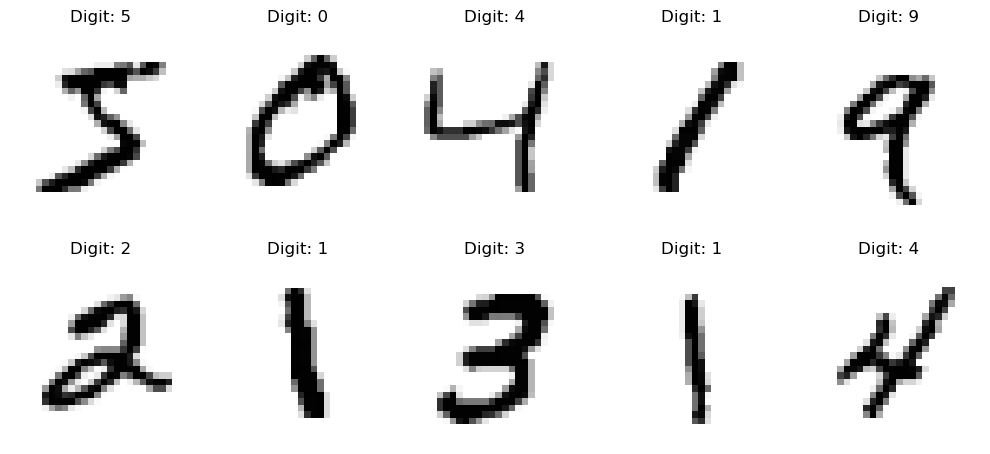

In [31]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()  # Flatten the 2x5 array into 1D

for i in range(10):
    digit = X.iloc[i].values  # Get the digit data and convert to NumPy array
    image = digit.reshape(28, 28)  # Reshape to 28x28
    axes[i].imshow(image, cmap=plt.cm.gray_r)
    axes[i].set_title(f"Digit: {y[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Using Decision tree classifier

In [33]:
dtc = DecisionTreeClassifier(random_state=22)

In [34]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=22)

In [35]:
y_pred = dtc.predict(X_test)

In [36]:
dt_accuracy=accuracy_score(y_test, y_pred)

In [37]:
dt_accuracy

0.8711428571428571

### Using Random Forest

In [39]:
rf_model = RandomForestClassifier()

In [40]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
rf_pred = rf_model.predict(X_test)

In [42]:
rf_accuracy = accuracy_score(y_test, rf_pred)

In [43]:
rf_accuracy

0.9669285714285715

In [50]:
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [56]:
print(rf_conf_matrix)

[[1325    0    5    1    2    2    3    1    4    0]
 [   0 1575    6    6    2    0    0    7    2    2]
 [   5    2 1337    3    8    2    8    7    7    1]
 [   1    0   23 1356    1   11    1   19   13    8]
 [   2    0    3    0 1257    0    3    3    2   25]
 [   3    2    1   22    2 1223    5    1   12    2]
 [   3    1    0    0    4   11 1373    0    4    0]
 [   2    6   22    0    4    1    0 1450    5   13]
 [   1    7   10   14    5    7    6    6 1293    8]
 [   6    6    5   13   20    3    1   11    7 1348]]


In [63]:
plt.clf()
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

<Figure size 640x480 with 0 Axes>

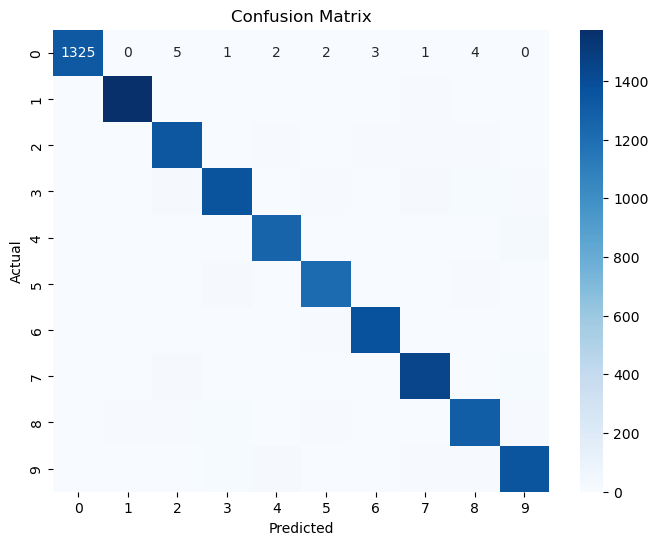

In [64]:
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(rf_conf_matrix, annot = True, fmt='d', cmap='Blues', annot_kws={"size":10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()